# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from scipy.stats import itemfreq as freq


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
df['prestige'] = df['prestige'].astype(int)
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61         3
1      1  660.0  3.67         3
2      1  800.0  4.00         1
3      1  640.0  3.19         4
4      0  520.0  2.93         4


/anaconda/envs/py27_ds_dt_13/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [3]:
groupby_admit = df.groupby('admit')
for admit, value in groupby_admit['gre']:
    print((admit, value.mean()))
    
#groupby_admit['gre','gpa'].mean() 

#groupby_admit['gre','gpa'].std() 

groupby_admit['prestige'].value_counts()

(0, 573.5793357933579)
(1, 618.5714285714286)


admit  prestige
0      2           95
       3           93
       4           55
       1           28
1      2           53
       1           33
       3           28
       4           12
Name: prestige, dtype: int64

## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [4]:
# frequency table for prestige and whether or not someone was admitted
print 'Frequency Table for prestige'
df['prestige'].value_counts()



Frequency Table for prestige


2    148
3    121
4     67
1     61
Name: prestige, dtype: int64

In [5]:
# frequency table for prestige and whether or not someone was admitted
print 'Frequency Table for admit'
df['admit'].value_counts()

Frequency Table for admit


0    271
1    126
Name: admit, dtype: int64

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [6]:
prestige_dummies = pd.get_dummies(df['prestige'], prefix='prestige')
#df_new = df.join(pd.get_dummies(df['prestige'], prefix='prestige', drop_first=True))

#prestige_dummies
#df_new

#features = [i for i in prestige_dummies.columns if 'prestige_' in i]
#features += ['gre']
#features += ['gpa']
#features += ['admit']
#features



#### 2.2 When modeling our class variables, how many do we need? 



Answer: We need one less than the count of unique values in the variable. In this case for 'prestige' , we need 3 class variables.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [7]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61           0           0           1           0
1      1  660.0  3.67           0           0           1           0
2      1  800.0  4.00           1           0           0           0
3      1  640.0  3.19           0           0           0           1
4      0  520.0  2.93           0           0           0           1


In [8]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

print pd.crosstab(handCalc['prestige_1'],handCalc['admit'])


admit         0   1
prestige_1         
0           243  93
1            28  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

Odds ( in favor ) of being admitted if you attend a 1 ranked college = 33/28 = 1.17
Probablity of being admitted if you attend a 1 ranked college = 33/(28+33) = 0.54

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

Odds of being admitted if you did not attend a 1 ranked college = 93/243 = 0.38
Probability of being admitted if you did not attend a 1 ranked college = 93/(243+93) = 0.28

#### 3.3 Calculate the odds ratio

1.17/0.38 = 3.08  ## check if this is correct################

#### 3.4 Write this finding in a sentenance: 

#### 3.5 Print the cross tab for prestige_4

In [9]:
print pd.crosstab(handCalc['prestige_4'],handCalc['admit'])

admit         0    1
prestige_4          
0           216  114
1            55   12


#### 3.6 Calculate the OR 

Odds of being admitted if you attended a 4 ranked college = 12/55 = 0.22
Odds of being admitted if you did not attend a 4 ranked college = 114/216 = 0.53

Odds Ratio (OR) = 0.22/0.53 = 0.42

#### 3.7 Write this finding in a sentence

Answer: If a student attended a #4 ranked grad school , the odds (likelihood) of getting admission is very low.

## Part 4. Analysis

In [10]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_1' :'prestige_3'])
print data.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3
0      0  380.0  3.61           0           0           1
1      1  660.0  3.67           0           0           1
2      1  800.0  4.00           1           0           0
3      1  640.0  3.19           0           0           0
4      0  520.0  2.93           0           0           0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [11]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [12]:
train_cols = data.columns[1:]
train_cols

Index([u'gre', u'gpa', u'prestige_1', u'prestige_2', u'prestige_3',
       u'intercept'],
      dtype='object')

#### 4.2 Fit the model

In [14]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [15]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:                 0.08166
Time:                        18:43:06   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_1     1.5534      0.417      3.721      0.0

In [52]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='admit ~ gre + gpa + prestige_1 + prestige_2 + prestige_3 + intercept', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Sat, 10 Jun 2017   Prob (F-statistic):           9.71e-08
Time:                        20:00:28   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2809      0.104     -2.704      0.007        -0.485    -0.077
gre            0.0004      0.000      1.997      0.047      6.48e-06     0.001
gpa            0.1508      0.064      2.349      0.019         0.025     0.277
prestige_1     0.3240      0.079      4.082      0.000         0.168     0.480
prestige_2     0.1605      0.066      2.440      0.015         0.031     0.290
prestige_3     0.0330      0.068      0.485      0.628        -0.101     0.167
intercept     -0.2809      0.104     -2.704      0.007        -0.485    -0.077
==============================================================================
Omnibus:                      152.312   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.314
Skew:                           0.678   Prob(JB):                     1.19e-11
Kurtosis:                       1.904   Cond. No.                     4.18e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
model = sm.OLS(data['admit'], data[train_cols])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Sat, 10 Jun 2017   Prob (F-statistic):           9.71e-08
Time:                        20:00:09   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0004      0.000      1.997      0.0

#### 4.3 Print the summary results

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR'] 

In [36]:
print np.exp(result.params)  ## Odds ratios of the co-efficients

gre           1.002221
gpa           2.180027
prestige_2    0.506548
prestige_3    0.262192
prestige_4    0.211525
intercept     0.020716
dtype: float64


In [37]:
#print result.conf_int()
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                2.5%     97.5%        OR
gre         1.000074  1.004372  1.002221
gpa         1.136120  4.183113  2.180027
prestige_2  0.272168  0.942767  0.506548
prestige_3  0.133377  0.515419  0.262192
prestige_4  0.093329  0.479411  0.211525
intercept   0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: ??? What does Odds Ratio imply for a Categorical Variable. Does this help us calculate the probability of getting an admission if the student attended a Rank 2 College?

#### 4.6 Interpret the OR of GPA

Answer: A unit increase in gpa increases the probablility of getting an admission by 118%.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [190]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [203]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))


[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [205]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combos['prestige'] = combos['prestige'].astype(int)
prestige_dummies = pd.get_dummies(combos['prestige'], prefix='prestige')
#prestige_dummies.columns = [ 'prestige_1','prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['prestige', 'gre', 'gpa', 'intercept']
combos = combos[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_2':])
print combos.head()
train_cols = combos.columns[1:]
print train_cols


   prestige    gre       gpa  intercept  prestige_2  prestige_3  prestige_4
0         1  220.0  2.260000        1.0           0           0           0
1         2  220.0  2.260000        1.0           1           0           0
2         3  220.0  2.260000        1.0           0           1           0
3         4  220.0  2.260000        1.0           0           0           1
4         1  220.0  2.453333        1.0           0           0           0
Index([u'gre', u'gpa', u'intercept', u'prestige_2', u'prestige_3',
       u'prestige_4'],
      dtype='object')


#### 5.2 Make predictions on the enumerated dataset

In [206]:
#print combos[train_cols]
combos['admit_pred'] = result.predict(combos[train_cols])

#### 5.3 Interpret findings for the last 4 observations

Answer: The last four observations ( last 4 students ) have the same gre and gpa and have a different rank( prestige). Given that four students have the same gre and gpa , the rank of their undergrad college determines their probability of getting an admission. Students with more prestigious colleges ( Ordered as Rank 1 - 4 ) have a higher probablity of getting admission given the other factors are same. 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [207]:
print combos.tail()

     prestige    gre       gpa  intercept  prestige_2  prestige_3  prestige_4  \
395         4  800.0  3.806667        1.0           0           0           1   
396         1  800.0  4.000000        1.0           0           0           0   
397         2  800.0  4.000000        1.0           1           0           0   
398         3  800.0  4.000000        1.0           0           1           0   
399         4  800.0  4.000000        1.0           0           0           1   

     admit_pred  
395    0.703609  
396    0.998415  
397    0.999337  
398    0.998721  
399    0.734040  


Populating the interactive namespace from numpy and matplotlib


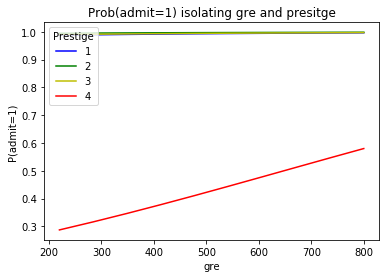

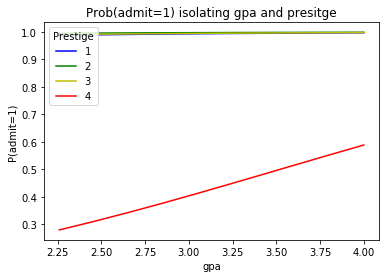

In [210]:
%pylab inline
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    # in case you're curious as to what this looks like
    # print grouped.head()
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])
        #print col
        #print plt_data

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')
   

In [ ]:
Based on the above dataset , it appears that gpa and gre matter only when a student attended a Rank 4 college